In [11]:
%matplotlib inline

import skimage.color
import skimage.io
import skimage.filters
import skimage.feature
import skimage.exposure

import spectral
import spectral.io.envi as envi

import numpy
import matplotlib.pyplot as plt
import pandas

import math
import sys, os

## Opening image

In [6]:
img = spectral.open_image('Visnir_cropped.hdr')
img

	Data Source:   '././Visnir_cropped'
	# Rows:            434
	# Samples:         679
	# Bands:           186
	Interleave:        BSQ
	Quantization:  32 bits
	Data format:   float32

## RGB and NIR bands

In [7]:
# Return the index of band that is closest to specified @wavelenght
def find_band(img, wavelength):
    diffs = [ (i, abs(v - wavelength)) for i, v in enumerate(img.bands.centers) ]
    closest = sorted(diffs, key=lambda t: t[1])[0]
    return closest[0]
    
bands = {
    'blue': find_band(img, 440),
    'green': find_band(img, 535),
    'red': find_band(img, 645),
    'nir': find_band(img, 800),
}
bands

{'blue': 10, 'green': 40, 'nir': 123, 'red': 75}

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0023613253142684698, 0.16329941153526306]
    G: [0.0023613253142684698, 0.16329941153526306]
    B: [0.0023613253142684698, 0.16329941153526306]

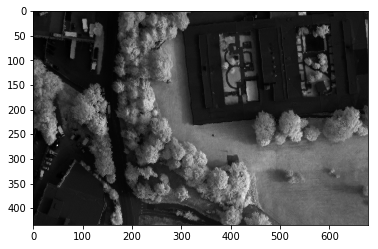

In [8]:
# TODO: Display a RGB image
band = img[:,:,bands['nir']]
spectral.imshow(band)

## Normalized Difference Vegetation Index

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.55785667896270752, 0.91874402761459351]
    G: [-0.55785667896270752, 0.91874402761459351]
    B: [-0.55785667896270752, 0.91874402761459351]

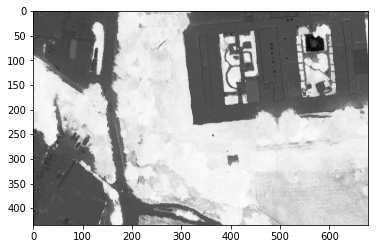

In [9]:
def calculate_ndvi(nir, red):
    return (nir-red)/(nir+red)
ndvi = calculate_ndvi(img[:,:,bands['nir']], img[:,:,bands['red']])
spectral.imshow(ndvi)

In [10]:
# TODO: Make bigger. Check that the NDVI image in a sensible range

## Mean spectrum
Compute the mean spectrum of all the pixels in the hypercube, show the spectrum in the report together with a spectrum from a region with plants, and a spectrum from a region with asphalt.

## NDVI histogram
Compute and display a histogram of all the NDVI values in the image

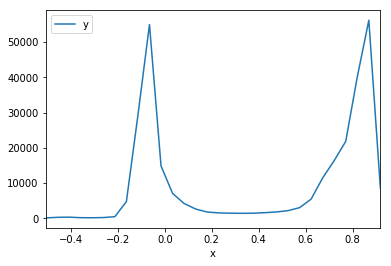

In [19]:
ndvi = calculate_ndvi(img[:,:,bands['nir']], img[:,:,bands['red']])
ndvi_histogram, bins = numpy.histogram(ndvi, bins=30)
ndvi_histogram

pandas.DataFrame({'x': bins[1:],'y': ndvi_histogram}).plot(x='x',kind='line')

## NDVI thresholded
Make a threshold of NDVI > 0.6 and set all values with NDVI > 0.6 to zero. Display this image. What do you see ?

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 1.0]
    G: [0.0, 1.0]
    B: [0.0, 1.0]

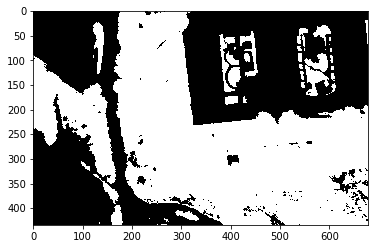

In [24]:
ndvi_thresholded = ndvi[:]
th = 0.6
ndvi_thresholded[ndvi_thresholded < th] = 0.0
ndvi_thresholded[ndvi_thresholded >= th] = 1.0
spectral.imshow(ndvi_thresholded)

Can you use this information to determine the fraction area of the image that has vegetation ?

In [38]:
total_area = ndvi_thresholded.shape[0]*ndvi_thresholded.shape[1]
vegetated = numpy.sum(ndvi_thresholded)
vegetation_fraction = vegetated / total_area
"{:.0f}%".format(vegetation_fraction * 100)

'53%'

## Principle Component Analysis
Carry out a principal component analysis (PCA) of the image, using the pca function from the Spectral Python. Can any of the first 3 components be used to identify vegetation in the image ? Include the first 3 score images in your report.

In [47]:
pc = spectral.principal_components(img)
pcred = pc.reduce(fraction=0.999)
img_pc = pcred.transform(img)
pcred.eigenvalues

Covariance.....  0.0Covariance.....  0.0Covariance.....done  


array([  4.23552279e-02,   9.63903043e-03,   2.46230646e-04,
         6.16468819e-05,   3.47865793e-05,   1.85420173e-05])

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.94916436620101274, 0.27146627737343243]
    G: [-0.12714450148754738, 1.4576273089595024]
    B: [-0.25011150728211973, 0.18639868960357348]

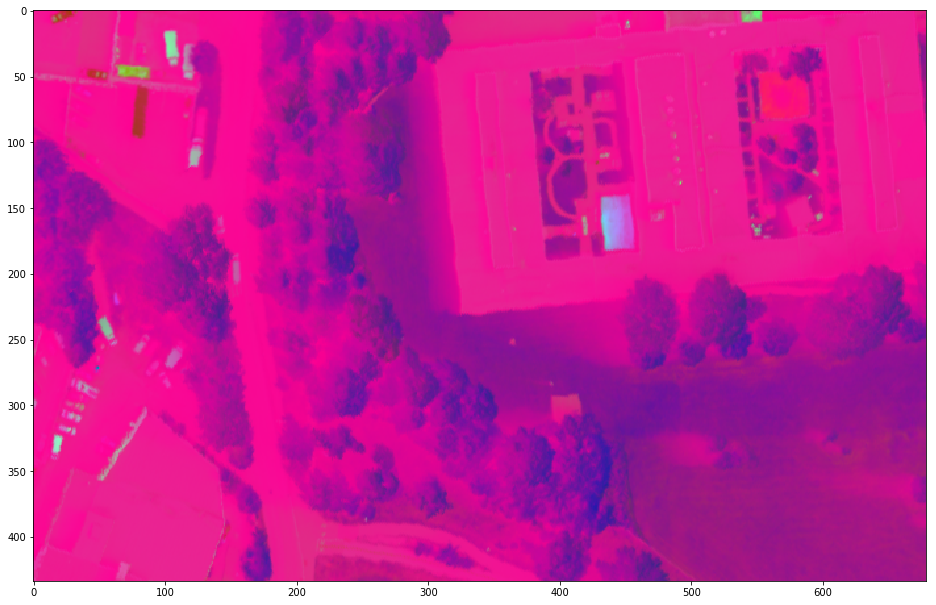

In [49]:
spectral.imshow(img_pc[:,:,:3], stretch_all=True, figsize=(16,16))

## K-means clustering
Carry out a k-means clustering, try with 2, 3, 4 and 5 classes. Plot the spectra for each group. How many components would you chose in order to group all the pixels with vegetation ?  Include one of the k-mean calculations in the report

In [53]:
m, c = spectral.kmeans(img, 4, 5)

Initializing clusters along diagonal of N-dimensional bounding box.
Iteration 1...  0.Iteration 1...  0.Iteration 1...  0.Iteration 1...  0.Iteration 1...  0.Iteration 1...  0.Iteration 1...  1.Iteration 1...  1.Iteration 1...  1.Iteration 1...  1.Iteration 1...  2.Iteration 1...  2.Iteration 1...  2.Iteration 1...  2.Iteration 1...  3.Iteration 1...  3.Iteration 1...  3.Iteration 1...  3.Iteration 1...  3.Iteration 1...  4.Iteration 1...  4.Iteration 1...  4.Iteration 1...  4.Iteration 1...  5.Iteration 1...  5.Iteration 1...  5.Iteration 1...  5.Iteration 1...  6.Iteration 1...  6.Iteration 1...  6.Iteration 1...  6.Iteration 1...  6.Iteration 1...  7.Iteration 1...  7.Iteration 1...  7.Iteration 1...  7.Iteration 1...  8.Iteration 1...  8.Iteration 1...  8.Iteration 1...  8.Iteration 1...  9.Iteration 1...  9.Iteration 1...  9.Iteration 1...  9.Iteration 1...  9.Iteration 1... 10.Iteration 1... 10.Iteration 1... 10.Iteration 1... 10.Iteration 1... 11.Iteration 1... 11.Iteration 1...

Iteration 2...  0.Iteration 2...  0.Iteration 2...  0.Iteration 2...  0.Iteration 2...  0.Iteration 2...  0.Iteration 2...  1.Iteration 2...  1.Iteration 2...  1.Iteration 2...  1.Iteration 2...  2.Iteration 2...  2.Iteration 2...  2.Iteration 2...  2.Iteration 2...  3.Iteration 2...  3.Iteration 2...  3.Iteration 2...  3.Iteration 2...  3.Iteration 2...  4.Iteration 2...  4.Iteration 2...  4.Iteration 2...  4.Iteration 2...  5.Iteration 2...  5.Iteration 2...  5.Iteration 2...  5.Iteration 2...  6.Iteration 2...  6.Iteration 2...  6.Iteration 2...  6.Iteration 2...  6.Iteration 2...  7.Iteration 2...  7.Iteration 2...  7.Iteration 2...  7.Iteration 2...  8.Iteration 2...  8.Iteration 2...  8.Iteration 2...  8.Iteration 2...  9.Iteration 2...  9.Iteration 2...  9.Iteration 2...  9.Iteration 2...  9.Iteration 2... 10.Iteration 2... 10.Iteration 2... 10.Iteration 2... 10.Iteration 2... 11.Iteration 2... 11.Iteration 2... 11.Iteration 2... 11.Iteration 2... 12.Iteration 2... 12.Iteration 

Iteration 3...  0.Iteration 3...  0.Iteration 3...  0.Iteration 3...  0.Iteration 3...  0.Iteration 3...  0.Iteration 3...  1.Iteration 3...  1.Iteration 3...  1.Iteration 3...  1.Iteration 3...  2.Iteration 3...  2.Iteration 3...  2.Iteration 3...  2.Iteration 3...  3.Iteration 3...  3.Iteration 3...  3.Iteration 3...  3.Iteration 3...  3.Iteration 3...  4.Iteration 3...  4.Iteration 3...  4.Iteration 3...  4.Iteration 3...  5.Iteration 3...  5.Iteration 3...  5.Iteration 3...  5.Iteration 3...  6.Iteration 3...  6.Iteration 3...  6.Iteration 3...  6.Iteration 3...  6.Iteration 3...  7.Iteration 3...  7.Iteration 3...  7.Iteration 3...  7.Iteration 3...  8.Iteration 3...  8.Iteration 3...  8.Iteration 3...  8.Iteration 3...  9.Iteration 3...  9.Iteration 3...  9.Iteration 3...  9.Iteration 3...  9.Iteration 3... 10.Iteration 3... 10.Iteration 3... 10.Iteration 3... 10.Iteration 3... 11.Iteration 3... 11.Iteration 3... 11.Iteration 3... 11.Iteration 3... 12.Iteration 3... 12.Iteration 

Iteration 4...  0.Iteration 4...  0.Iteration 4...  0.Iteration 4...  0.Iteration 4...  0.Iteration 4...  0.Iteration 4...  1.Iteration 4...  1.Iteration 4...  1.Iteration 4...  1.Iteration 4...  2.Iteration 4...  2.Iteration 4...  2.Iteration 4...  2.Iteration 4...  3.Iteration 4...  3.Iteration 4...  3.Iteration 4...  3.Iteration 4...  3.Iteration 4...  4.Iteration 4...  4.Iteration 4...  4.Iteration 4...  4.Iteration 4...  5.Iteration 4...  5.Iteration 4...  5.Iteration 4...  5.Iteration 4...  6.Iteration 4...  6.Iteration 4...  6.Iteration 4...  6.Iteration 4...  6.Iteration 4...  7.Iteration 4...  7.Iteration 4...  7.Iteration 4...  7.Iteration 4...  8.Iteration 4...  8.Iteration 4...  8.Iteration 4...  8.Iteration 4...  9.Iteration 4...  9.Iteration 4...  9.Iteration 4...  9.Iteration 4...  9.Iteration 4... 10.Iteration 4... 10.Iteration 4... 10.Iteration 4... 10.Iteration 4... 11.Iteration 4... 11.Iteration 4... 11.Iteration 4... 11.Iteration 4... 12.Iteration 4... 12.Iteration 

Iteration 5...  0.Iteration 5...  0.Iteration 5...  0.Iteration 5...  0.Iteration 5...  0.Iteration 5...  0.Iteration 5...  1.Iteration 5...  1.Iteration 5...  1.Iteration 5...  1.Iteration 5...  2.Iteration 5...  2.Iteration 5...  2.Iteration 5...  2.Iteration 5...  3.Iteration 5...  3.Iteration 5...  3.Iteration 5...  3.Iteration 5...  3.Iteration 5...  4.Iteration 5...  4.Iteration 5...  4.Iteration 5...  4.Iteration 5...  5.Iteration 5...  5.Iteration 5...  5.Iteration 5...  5.Iteration 5...  6.Iteration 5...  6.Iteration 5...  6.Iteration 5...  6.Iteration 5...  6.Iteration 5...  7.Iteration 5...  7.Iteration 5...  7.Iteration 5...  7.Iteration 5...  8.Iteration 5...  8.Iteration 5...  8.Iteration 5...  8.Iteration 5...  9.Iteration 5...  9.Iteration 5...  9.Iteration 5...  9.Iteration 5...  9.Iteration 5... 10.Iteration 5... 10.Iteration 5... 10.Iteration 5... 10.Iteration 5... 11.Iteration 5... 11.Iteration 5... 11.Iteration 5... 11.Iteration 5... 12.Iteration 5... 12.Iteration 

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 3.0]
    G: [0.0, 3.0]
    B: [0.0, 3.0]

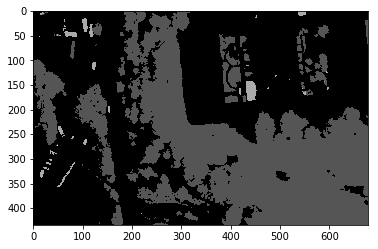

In [64]:
#c[0,:]
spectral.imshow(m, stretch_all=True)

Which method to determine the amount of vegetation do you think is most appropriate in this hyperspectral image ? Describe why you prefer one method before another.

NVDI is the most appropriate. It is a standard procedure for vegetation with known performace, gives a degree (not just yes/no) answer. It is also the fastest to compute. PCA would be second, it can also give degree. Nice here is that it may highlight other interesting aspects